In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [2]:
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    
    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

In [3]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [4]:
def visualize_model(model):
    plot_model(
        model,
        to_file="model.png",
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        expand_nested=False,
        dpi=96,
    )
    return Image('model.png')

In [5]:
def train(model, x_train, y_train, x_test, y_test):
    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        validation_split=0.2,
                        verbose=1)
    return history

C:\Users\Aniketha Prasad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


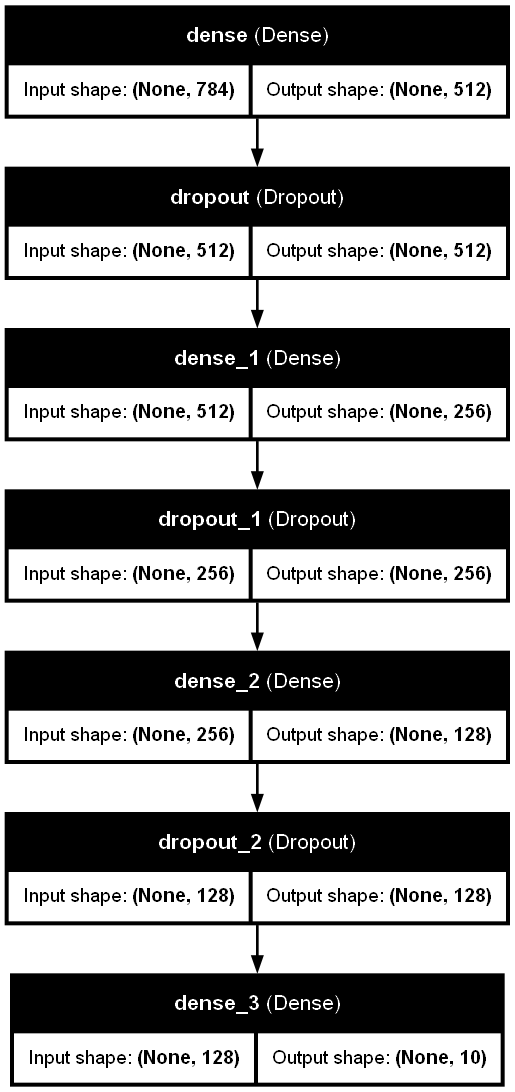

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8064 - loss: 0.6131 - val_accuracy: 0.9607 - val_loss: 0.1334
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9591 - loss: 0.1360 - val_accuracy: 0.9685 - val_loss: 0.1049
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9722 - loss: 0.0920 - val_accuracy: 0.9729 - val_loss: 0.0936
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9786 - loss: 0.0703 - val_accuracy: 0.9769 - val_loss: 0.0854
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9792 - loss: 0.0618 - val_accuracy: 0.9758 - val_loss: 0.0825
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9846 - loss: 0.0496 - val_accuracy: 0.9751 - val_loss: 0.0903
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9866 - loss: 0.0424 - val_accuracy: 0.9762 - val_loss: 0.0914
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9882 - loss: 0.0396 - val_accu

In [7]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
model = create_model()
display_image = visualize_model(model)
display(display_image)
history = train(model, x_train, y_train, x_test, y_test)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

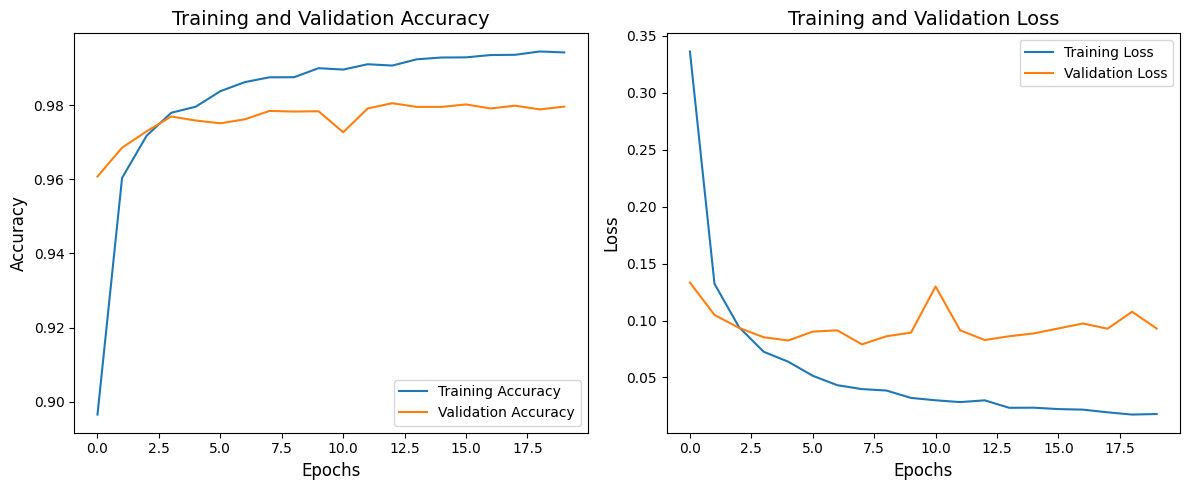

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:


<Axes: >

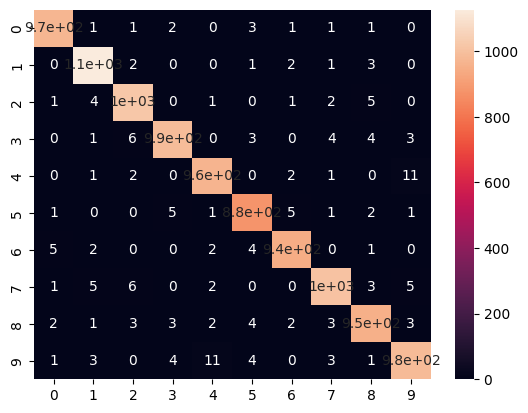

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Generate predictions
y_pred = model.predict(x_test)

# Convert predictions and true labels back to their original class format
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Print confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm,annot=True)